In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mean_01 = np.array([1.0, 3.0])
mean_02 = np.array([-1.0, 0.0])

cov_01 = np.array([[0.8, 0.3], [0.3, 0.9]])
cov_02 = np.array([[0.9, 0.4], [0.4, 0.8]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 200)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 200)

print dist_01.shape, dist_02.shape

(200, 2) (200, 2)


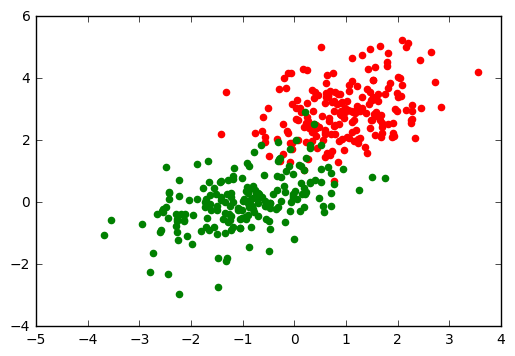

In [3]:
plt.figure(0)
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')

plt.show()

(400, 2) [  1.07051405e-03   1.49930619e+00]
[  8.02136135e-17   2.53963517e-16] [ 1.  1.]


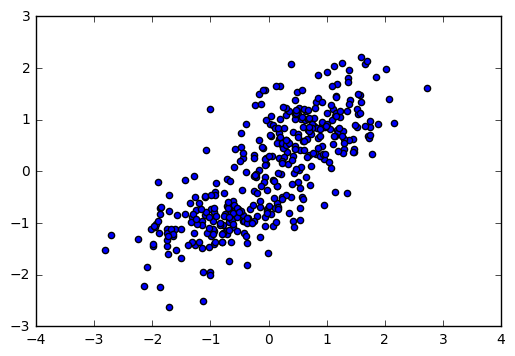

In [4]:
data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02

print data.shape, data.mean(axis=0)

data_std = (data - data.mean(axis=0))/data.std(axis=0)
print data_std.mean(axis=0), data_std.std(axis=0)

plt.figure(0)
plt.scatter(data_std[:, 0], data_std[:, 1])
plt.show()

In [5]:
centers = np.random.uniform(low=data_std.min(), high=data_std.max(), size=(2, 2))
print centers

[[ 1.91957144  1.77076119]
 [ 1.36528121  0.06010414]]


In [6]:
def dist(p1, p2):
    # Eucledian distance
    return np.sqrt(((p1 - p2)**2).sum())


In [7]:
def KMeansClustering(X_data, k=2, stop_iter=10, def_clusters=None):
    dim = X_data.shape[1]
    
    if def_clusters is None:
        centers = np.random.uniform(low=X_data.min(), high=X_data.max(), size=(k, dim))##generate k points each with dim dimensions
        clusters = {}
    
        for i in range(k):### making k dictionaries ,each with a centre and points assigned to that cluster centre
            clusters[i] = {
                'center': centers[i, :],
                'points': []
            }
    else:
        clusters = def_clusters
        
        
    
    curr_iter = 0
    stop = False
    while (not stop):
        for i in range(X_data.shape[0]):
            distance_i = []
            for j in range(k):## for k centers
                distance_i.append(dist(X_data[i, :], clusters[j]['center']))
                
            distance_i = np.asarray(distance_i)## distances=[2.3 ,4.5 ,6] where 2.3 is distance from centre0, 4.5 is distance from centre1
            c = distance_i.argmin()##c is centre that is at least distance
            
            clusters[c]['points'].append(X_data[i, :])
      
        plt.figure(0)
        cols = ['cyan', 'green', 'blue', 'yellow', 'pink']
        
        for n in range(k):
            pts = np.asarray(clusters[n]['points'])## points of cluster n
            c = clusters[n]['center'] ## centre of cluster n
            plt.scatter(pts[:, 0], pts[:, 1], color=cols[n])##plotting the points
            #plt.scatter(clusters[n]['center'][0], clusters[n]['center'][1], color='red')##showing centres in red
            
            if len(clusters[n]['points']) == 0:## if no point assigned to cluster 
                       pass## so no error comes even if no point assigned
            else:
                clusters[n]['center'] = pts.mean(axis=0)### shift the cluster centre at mean of points
            
            clusters[n]['points'] = []## empty the list of points so new points can be assigned
        
        curr_iter += 1
        
        if (curr_iter >= stop_iter):
            for n in range(k):
                plt.scatter(clusters[n]['center'][0], clusters[n]['center'][1], color='red')##showing final centres in red
            stop = True
            
    return clusters


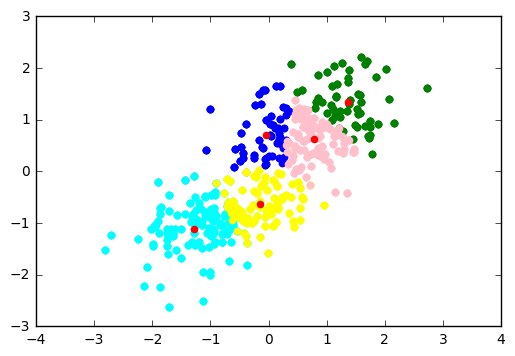

In [9]:
cluster=KMeansClustering(data_std, k=5, stop_iter=5, def_clusters=None)### shows centres after 5 iterations after

In [13]:
cluster[0]['points']

[]